# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 3: Web APIs & NLP

## Part 3

## Importing and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pickle 
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from random import randint
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import nltk
from nltk import FreqDist
from nltk.util import ngrams
from collections import Counter


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

jp_cleaned = pd.read_pickle('data/jp_cleaned.pkl')
kr_cleaned = pd.read_pickle('data/kr_cleaned.pkl')

In [2]:
jp_cleaned

Comment ID           Timestamp  \
0       dwkf6l4 2018-03-31 04:41:48   
1       dwk6wsz 2018-03-31 01:40:06   
2       dwk9186 2018-03-31 02:24:31   
3       dwkjj5i 2018-03-31 06:55:34   
4       dwk7cyw 2018-03-31 01:49:27   
5       dwk80yr 2018-03-31 02:03:19   
6       dwkier9 2018-03-31 06:16:03   
7       dwkj1fq 2018-03-31 06:37:59   
8       dwkgdo3 2018-03-31 05:13:15   
9       dwkcisi 2018-03-31 03:39:59   
10      dwkil8q 2018-03-31 06:22:13   
11      dwkq3ko 2018-03-31 11:31:03   
12      dwksrcu 2018-03-31 12:55:35   
13      dwk7ehn 2018-03-31 01:50:18   
14      dwlyu3t 2018-04-01 02:41:49   
15      dwki1j0 2018-03-31 06:03:40   
16      dwkp8ps 2018-03-31 10:56:34   
17      dwki9s1 2018-03-31 06:11:18   
18      dwkhpbr 2018-03-31 05:52:37   
19      dwki8ix 2018-03-31 06:10:08   
20      dwkl2p1 2018-03-31 07:54:45   
21      dwktxy9 2018-03-31 13:26:12   
22      dwkujbo 2018-03-31 13:40:53   
23      dwkw4t7 2018-03-31 14:17:41   
24      dwk6z30 2018-03-31 01:41:24   
25      dwkmtpn 2018-03-31 09:09:04   
26      dwkrusk 2018-03-31 12:29:44   
27      dwlnpdx 2018-03-31 23:02:17   
28      dwk66nl 2018-03-31 01:25:05   
29      dwl1cv3 2018-03-31 16:02:57   
30      e6k9f25 2018-09-24 18:19:59   
31      dwkwweg 2018-03-31 14:34:12   
32      dxbfbh7 2018-04-13 19:38:16   
33      dwm7dup 2018-04-01 06:06:17   
34      dwl772w 2018-03-31 17:51:13   
35      dwloa77 2018-03-31 23:13:34   
36      dwkfx47 2018-03-31 05:00:54   
37      dwkfxnj 2018-03-31 05:01:18   
38      dwkftah 2018-03-31 04:58:07   
39      dwm8dsz 2018-04-01 06:38:20   
40      dwl5s93 2018-03-31 17:25:14   
41      dwk8hc6 2018-03-31 02:13:01   
42      dwkkbof 2018-03-31 07:24:54   
43      dwkimge 2018-03-31 06:23:21   
44      dwktdzi 2018-03-31 13:12:24   
45      dwkj07s 2018-03-31 06:36:48   
46      dwkjf11 2018-03-31 06:51:21   
47      dwlrtfv 2018-04-01 00:22:01   
48      dwmsdrg 2018-04-01 16:30:22   
49      dwlnxkv 2018-03-31 23:06:43   
50      dwkamg4 2018-03-31 02:58:37   
51      dwk9mwn 2018-03-31 02:37:29   
52      dwkaid0 2018-03-31 02:56:09   
53      dwkwtci 2018-03-31 14:32:21   
54      dwksf12 2018-03-31 12:46:16   
55      dy29ojj 2018-04-27 14:57:07   
56      dwlbb69 2018-03-31 19:08:50   
57      dwmbvk0 2018-04-01 08:50:00   
58      dwkk39b 2018-03-31 07:16:08   
59      dwk87kh 2018-03-31 02:07:12   
60      dwkvrir 2018-03-31 14:09:40   
61      dwkj6xp 2018-03-31 06:43:27   
62      dwkj43y 2018-03-31 06:40:38   
63      dwkh1en 2018-03-31 05:31:59   
64      dwkkqpn 2018-03-31 07:41:16   
65      dwku001 2018-03-31 13:27:37   
66      dwlpwk5 2018-03-31 23:45:14   
67      dwkjktj 2018-03-31 06:57:18   
68      dwkicg1 2018-03-31 06:13:52   
69      dwksmtz 2018-03-31 12:52:09   
70      dwl07th 2018-03-31 15:41:29   
71      dwkg6gl 2018-03-31 05:07:51   
72      dwkpubd 2018-03-31 11:21:04   
73      dwkzapc 2018-03-31 15:23:30   
74      dwkwh4a 2018-03-31 14:24:57   
75      dwkvbrn 2018-03-31 13:59:49   
76      dwkg2d7 2018-03-31 05:04:46   
77      dwl62cz 2018-03-31 17:30:14   
78      dwkkv9l 2018-03-31 07:46:25   
79      dwkkj9v 2018-03-31 07:33:12   
80      dwlssj5 2018-04-01 00:40:56   
81      dwm0au7 2018-04-01 03:11:31   
82      dwkjh8e 2018-03-31 06:53:37   
83      dwlx9is 2018-04-01 02:09:47   
84      dwl8gfj 2018-03-31 18:14:33   
85      dwkb00i 2018-03-31 03:06:53   
86      dwkbd9n 2018-03-31 03:14:57   
87      dwksu6d 2018-03-31 12:57:40   
88      dwlpt4r 2018-03-31 23:43:24   
89      dwkp3nm 2018-03-31 10:50:36   
90      dwkb5d0 2018-03-31 03:10:05   
91      dwkw5vi 2018-03-31 14:18:21   
92      dwkizzv 2018-03-31 06:36:36   
93      dwkiagb 2018-03-31 06:11:55   
94      dwlpwcj 2018-03-31 23:45:07   
95      dwke35l 2018-03-31 04:15:44   
96      dwklko7 2018-03-31 08:15:13   
97      dwkgwqf 2018-03-31 05:28:12   
98      dwkqmrw 2018-03-31 11:50:36   
99      dwrz7oc 2018-04-04 04:39:00   
100     dwloifx 2018-03-31 23:18:09   
101     dwkx5uv 2018-03-31 

In [3]:
kr_cleaned

Comment ID           Timestamp  \
0       ir411me 2022-10-05 04:20:31   
1       ir4ns6m 2022-10-05 09:18:32   
2       ir3savu 2022-10-05 02:59:37   
3       ir3okpj 2022-10-05 02:28:30   
4       ir4gqjt 2022-10-05 07:33:20   
5       ir4op9h 2022-10-05 09:32:08   
6       isvgfrm 2022-10-19 00:07:52   
7       j5nw8o7 2023-01-24 09:40:18   
8       iri4rrs 2022-10-08 10:42:35   
9       ir5zzdj 2022-10-05 16:16:37   
10      ir3ziyl 2022-10-05 04:05:17   
11      ir3x6oj 2022-10-05 03:43:02   
12      it3ydw4 2022-10-20 19:28:53   
13      iwb57di 2022-11-14 09:30:21   
14      jr4cvte 2023-07-08 05:33:08   
15      jugatgm 2023-08-02 07:06:06   
16      ir4314o 2022-10-05 04:41:15   
17      ir44c75 2022-10-05 04:55:25   
18      ir45g6e 2022-10-05 05:07:44   
19      ir57ypy 2022-10-05 13:00:23   
20      ir5x80l 2022-10-05 15:58:41   
21      ir43x1l 2022-10-05 04:50:48   
22      ir46okv 2022-10-05 05:21:53   
23      ir42wmj 2022-10-05 04:39:58   
24      ir7ywt6 2022-10-06 00:16:09   
25      ir69g6b 2022-10-05 17:17:02   
26      isw74rn 2022-10-19 03:32:50   
27      jsm71wt 2023-07-19 17:30:33   
28      irtkg0j 2022-10-10 22:53:47   
29      j1po7j9 2022-12-26 11:27:33   
30      ir40fmt 2022-10-05 04:14:26   
31      ir44mqs 2022-10-05 04:58:39   
32      ir3z9wh 2022-10-05 04:02:52   
33      ir3zqf8 2022-10-05 04:07:19   
34      ir40w7x 2022-10-05 04:19:03   
35      ir5cypd 2022-10-05 13:39:09   
36      ir4hime 2022-10-05 07:44:31   
37      jbd88qf 2023-03-08 04:59:47   
38      iwdg3oy 2022-11-14 20:44:36   
39      ir80pco 2022-10-06 00:30:52   
40      ir45th7 2022-10-05 05:11:59   
41      ir45xvk 2022-10-05 05:13:23   
42      ir4ifp4 2022-10-05 07:58:06   
43      ir463z3 2022-10-05 05:15:20   
44      ir7ha7j 2022-10-05 21:59:34   
45      ir5tsz4 2022-10-05 15:36:29   
46      ir7fq9q 2022-10-05 21:48:43   
47      ir9vcj2 2022-10-06 12:40:10   
48      iu22al9 2022-10-27 23:47:38   
49      ir8k031 2022-10-06 03:13:48   
50      ir42dlx 2022-10-05 04:34:25   
51      ir403op 2022-10-05 04:11:03   
52      ir43b63 2022-10-05 04:44:16   
53      iwg3w2w 2022-11-15 11:29:45   
54      ir813oy 2022-10-06 00:34:12   
55      ir5vb8a 2022-10-05 15:46:20   
56      ir7igpz 2022-10-05 22:07:49   
57      ir7n2x5 2022-10-05 22:41:30   
58      ir7szvj 2022-10-05 23:27:37   
59      irbcq7h 2022-10-06 18:47:27   
60      ir8unlf 2022-10-06 04:59:02   
61      ir45ku2 2022-10-05 05:09:13   
62      iwjzirw 2022-11-16 04:44:28   
63      iwg3yb0 2022-11-15 11:30:35   
64      ir7jipq 2022-10-05 22:15:24   
65      ir46zh3 2022-10-05 05:25:24   
66      ir8vjuw 2022-10-06 05:08:54   
67      ir8h1fn 2022-10-06 02:47:33   
68      ir8ytke 2022-10-06 05:47:13   
69      jtqascu 2023-07-27 22:58:35   
70      jtowpej 2023-07-27 17:39:59   
71      jtrdxnn 2023-07-28 04:02:43   
72      jtrqsqq 2023-07-28 06:14:04   
73      jtp5jmy 2023-07-27 18:35:34   
74      jtqqecv 2023-07-28 00:52:19   
75      jtroryn 2023-07-28 05:51:04   
76      jtoyhfl 2023-07-27 17:50:53   
77      jtqux4j 2023-07-28 01:26:39   
78      jtryp1v 2023-07-28 07:51:55   
79      jtu017t 2023-07-28 17:48:28   
80      jtvi06j 2023-07-28 23:40:50   
81      jtyvmkl 2023-07-29 17:37:34   
82      jtriiml 2023-07-28 04:45:40   
83      jtvapil 2023-07-28 22:49:04   
84      jtwu77k 2023-07-29 06:51:30   
85      jtxermo 2023-07-29 11:19:53   
86      jtysn5r 2023-07-29 17:18:25   
87      jtplali 2023-07-27 20:14:30   
88      jtu44kk 2023-07-28 18:13:43   
89      ju1fuk0 2023-07-30 05:32:47   
90      jtqd4dz 2023-07-27 23:14:55   
91      jtoxbtq 2023-07-27 17:43:48   
92      jtp06hk 2023-07-27 18:01:15   
93      jtr8yz9 2023-07-28 03:19:17   
94      jtppkqu 2023-07-27 20:41:09   
95      jtptb3s 2023-07-27 21:04:25   
96      jtsaofv 2023-07-28 10:26:20   
97      jtrqww7 2023-07-28 06:15:23   
98      jtoyu3g 2023-07-27 17:53:00   
99      jtu13ac 2023-07-28 17:54:53   
100     jtu09q0 2023-07-28 17:49:55   
101     jtz6kxs 2023-07-29 

In [4]:
# Resetting to display only a certain number of rows and columns
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

## Exploratory data analysis

### Word Cloud
A word cloud is a visual representation of text data. It displays a list of words, the importance of each being shown with font size. In a word cloud, the more frequent a word appears in the text, the bigger and bolder it appears in the word cloud.

In [5]:
stopwords = set(STOPWORDS)

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    """
    Function to generate random colors for each word in the word cloud
    """
    # Generate random RGB values for the word
    r = randint(0, 255)
    g = randint(0, 255)
    b = randint(0, 255)
    return f"rgb({r}, {g}, {b})"

def show_wordcloud(data, title = None):
    """
    Function to show word clouds, without stop words
    """
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        color_func=random_color_func, # Use custom color function
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

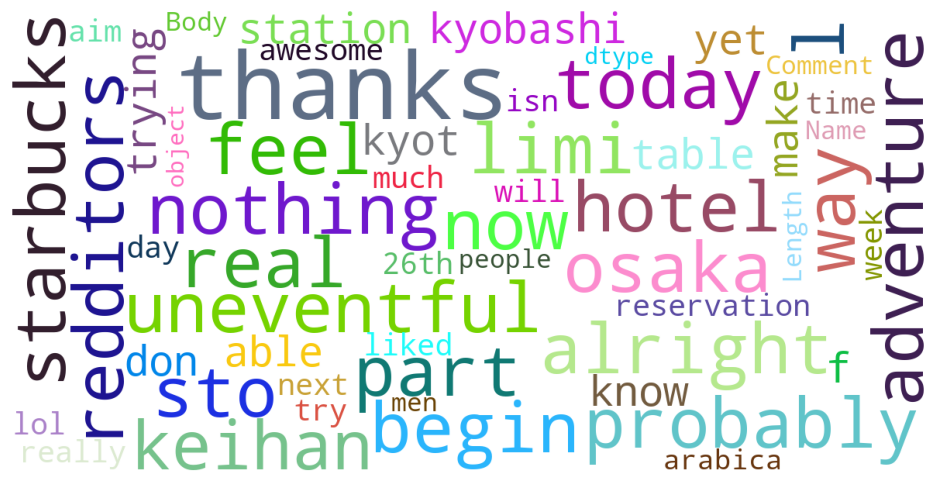

In [6]:
# word cloud for r/JapanTravel
show_wordcloud(jp_cleaned['Comment Body'])

Visually we can identify that `thanks`, a prefecture in Japan, appears as the most mentioned word in `r/JapanTravel`. We can also see that `kyobashi` and `osaka` are mentioned quite a number of times. Which are both related to Japan. 

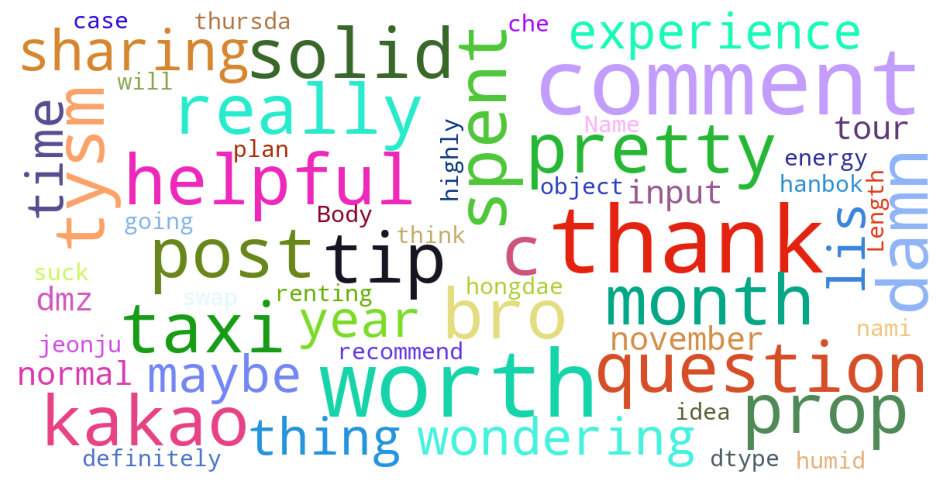

In [7]:
# word cloud for r/JapanTravel
show_wordcloud(kr_cleaned['Comment Body'])

Similarly, `thank` appears to be the most mentioned word in `r/koreatravel`. Which means that majority of the comments are people replying with gratitude. We can also identify `nami` and `jeonju` in the word cloud. Both are names of places of interests. Which we can also use for recommendations.

### Scatter plots

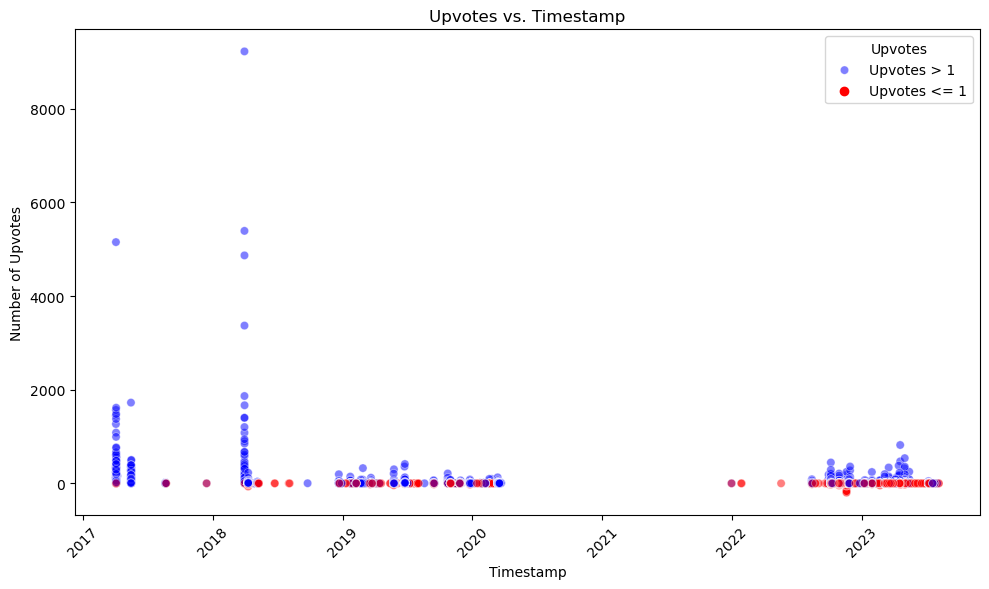

In [8]:
# Define a new column for color mapping based on the condition
jp_cleaned['color'] = np.where(jp_cleaned['Upvotes'] > 1, 'blue', 'red')

# Create the scatter plot using sns.scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Timestamp', y='Upvotes', hue='color', data=jp_cleaned, alpha=0.5, 
                palette={'blue':'blue', 'red':'red'}, hue_order=['red', 'blue'])

plt.xlabel('Timestamp')
plt.ylabel('Number of Upvotes')
plt.title('Upvotes vs. Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Upvotes', labels=['Upvotes > 1', 'Upvotes <= 1'])
plt.show()

# If you don't need the 'color' column anymore, you can drop it
jp_cleaned.drop('color', axis=1, inplace=True)


Given that the comments for this analysis were gathered from the top posts, there are several outliers that stand out from most of the comments. In particular, there are comments that have amassed more than 2000 upvotes. Therefore, to gain a clearer perspective on the distribution, I'll be recreating the plot after adjusting the range of upvotes considered. This will help to give a more accurate picture of the data's behavior, excluding the extreme cases.

/var/folders/20/j6w9frk56dlgcpcrhhsd5yc40000gn/T/ipykernel_66796/1008076653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jp_top['color'] = np.where(filtered_jp_top['Upvotes'] > 1, 'blue', 'red')


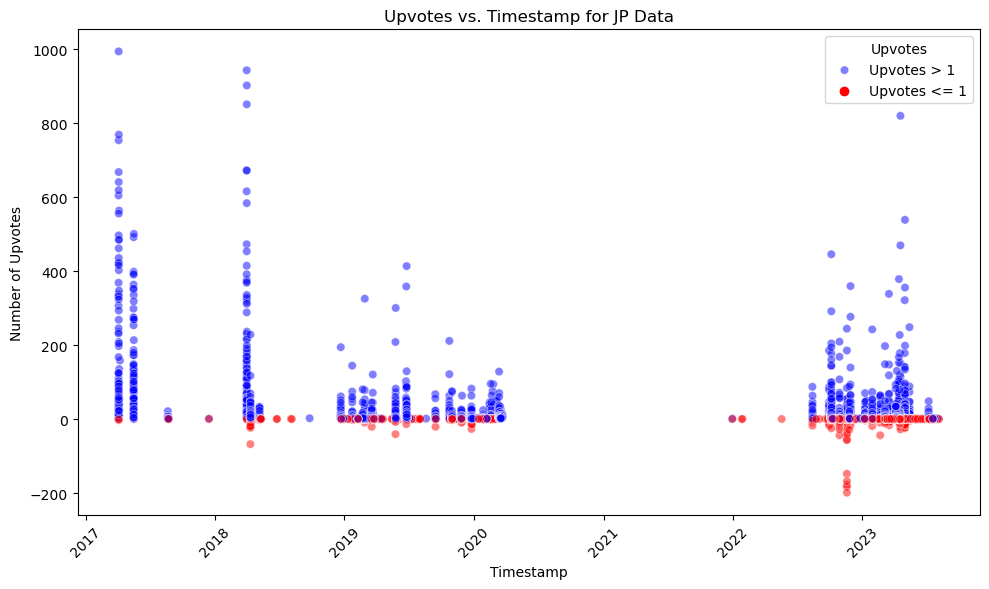

(7989, 5)


/var/folders/20/j6w9frk56dlgcpcrhhsd5yc40000gn/T/ipykernel_66796/1008076653.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jp_top.drop('color', axis=1, inplace=True)


In [9]:
# Filter rows where 'Upvotes' is less than or equal to 1000
filtered_jp_top = jp_cleaned[jp_cleaned['Upvotes'] <= 1000]

# Define a new column for color mapping based on the condition
filtered_jp_top['color'] = np.where(filtered_jp_top['Upvotes'] > 1, 'blue', 'red')

# Create the scatter plot using sns.scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Timestamp', y='Upvotes', hue='color', data=filtered_jp_top, alpha=0.5, 
                palette={'blue':'blue', 'red':'red'}, hue_order=['red', 'blue'])

plt.xlabel('Timestamp')
plt.ylabel('Number of Upvotes')
plt.title('Upvotes vs. Timestamp for JP Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Upvotes', labels=['Upvotes > 1', 'Upvotes <= 1'])
plt.show()

print(filtered_jp_top.shape)

# If you don't need the 'color' column anymore, you can drop it
filtered_jp_top.drop('color', axis=1, inplace=True)

With the upvotes set to <= 1000, we can see the difference between the voting score of >= 1 and <=1 much clearer. As the scatter plot is plotted against `Timestamp`, we can see a clear picture that there are zero interests in `r/JapanTravel` during covid lockdown period. And the interest is now picking back up as the borders are reopening. There are alot more upvoted comments as compared to downvoted comments, which may be due to the positive experiences and helpful information shared by users in the `r/JapanTravel` subreddit. As travel was restricted during the lockdown, many individuals were seeking advice, tips, and experiences from those who had traveled to Japan before. It is also interesting to see that from 2017 to 2019, upvotes were spiking only during the start of the year. It may be due to travellers being interested in enquiring about <u>[Cherry Blossoms Season](https://www.wonderopolis.org/wonder/what-are-sakura?replytocom=2611)</u>, which happens during March-April period. 

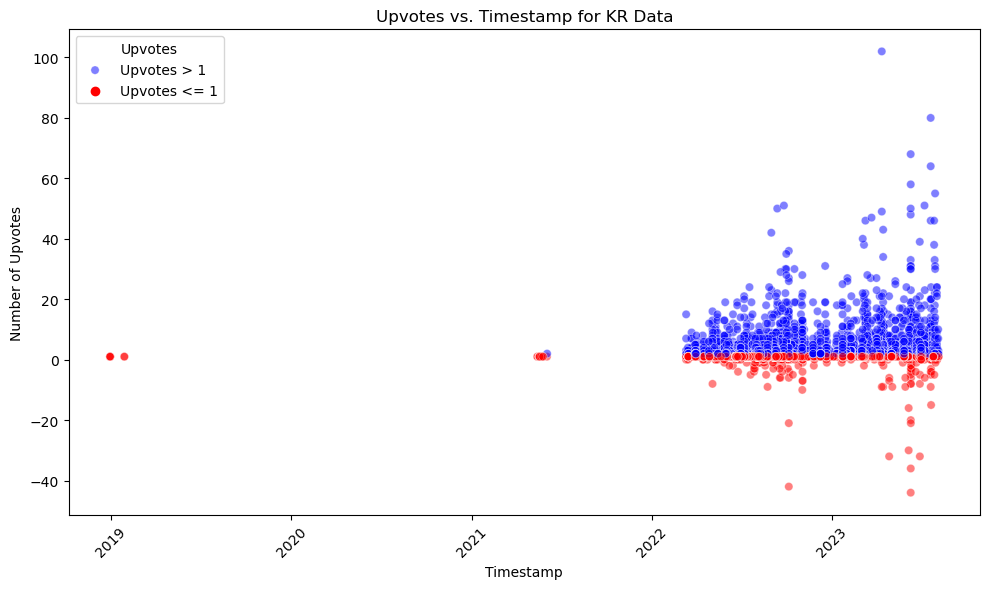

In [10]:
# Define a new column for color mapping based on the condition
kr_cleaned['color'] = np.where(kr_cleaned['Upvotes'] > 1, 'blue', 'red')

# Create the scatter plot using sns.scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Timestamp', y='Upvotes', hue='color', data=kr_cleaned, alpha=0.5, 
                palette={'blue':'blue', 'red':'red'}, hue_order=['red', 'blue'])

plt.xlabel('Timestamp')
plt.ylabel('Number of Upvotes')
plt.title('Upvotes vs. Timestamp for KR Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Upvotes', labels=['Upvotes > 1', 'Upvotes <= 1'])
plt.show()

# If you don't need the 'color' column anymore, you can drop it
kr_cleaned.drop('color', axis=1, inplace=True)

Comparing `r/JapanTravel` and `r/koreatravel` subreddits, we can see that there is a huge difference in interest between the two of them. Although similarly to `r/JapanTravel`, where interest is picking due to the borders reopening, there is also not much interest even before covid lockdown. 

In [11]:
# determine the date range of the posts extracted
print(jp_cleaned['Timestamp'].min())
print(jp_cleaned['Timestamp'].max())

2017-04-03 15:00:19
2023-08-05 07:12:55


In [12]:
# determine the date range of the posts extracted
print(kr_cleaned['Timestamp'].min())
print(kr_cleaned['Timestamp'].max())

2018-12-29 19:01:30
2023-08-04 15:58:41


As our model is based on tokenized words against upvotes, there is no need to drop outliers that is caused by Timestamp for now. 

## Modelling (Naive Bayes)

CountVectorizer and Naive Bayes synergize well for text processing tasks, especially for classification. Here are the benefits of using them in tandem:

- **Simplicity**: Both CountVectorizer and Naive Bayes are straightforward yet perform remarkably well for text classification.

- **Efficiency**: They're fast and scalable, apt for large datasets.
Handles High Dimensions: Ideal for the vast feature spaces produced by text vectorization.

- **Great Baseline**: Serves as a benchmark for comparing more complex models.
Feature Independence: The naive assumption of feature independence often results in robust performance.

- **Resilience**: Less prone to overfitting and handles out-of-vocabulary words well.
Probabilistic Output: Offers a measure of confidence in predictions.

Together, they form a resilient and efficient combo for text classification tasks.

### Japan

#### Data Preprocessing
First, we'll perform some basic preprocessing on our DataFrame `jp_cleaned`. I'll also be dropping outliers in `jp_cleaned` with Upvotes more than 2000. I did not chose to drop Upvotes more than 1000 as that would greatly decrease our data size. 

In [13]:
# Drop the 'Comment ID' column
jp_cleaned.drop('Comment ID', axis=1, inplace=True)
jp_cleaned.drop('Timestamp', axis=1, inplace=True)

# Filter out rows with Upvotes >= 2000
jp_cleaned = jp_cleaned[jp_cleaned['Upvotes'] < 2000]

# Display the updated DataFrame
print(jp_cleaned.shape)
jp_cleaned.head()

(8003, 2)


Comment Body  Upvotes
0  this probably the most uneventful part the sto...     1081
1  what hotel osaka with nothing today and feel l...      673
3                               the way for real now      377
4  the starbucks keihan kyobashi station can kyot...      473
5      going guess made other arrangement this point      171

#### Data Transformation
Next, we'll transform our data. The goal here is to convert our upvotes into binary form (0 and 1), which would be suitable for binary classification models.
Power Transformation and Upvotes Mapping in `jp_cleaned` Dataset.

**Power Transformation**: 
   - **Why?**: The `PowerTransformer` is utilized on the 'Upvotes' column to transform the data to resemble a Gaussian distribution. This adjustment aids in mitigating variance and rectifying skewness, which in turn supports various statistical techniques premised on normal distribution. Setting the threshold at the 50th percentile allows us to create a binary differentiation, classifying upvotes above the median as high (1) and those below as low (0), providing a balanced categorization for further analysis.
   - **How?**: The Yeo-Johnson transformation method is used, and the standardized transformed values are stored in a new column 'Upvotes_scaled'.

**Defining Threshold and Mapping Function**:
   - **Why?**: The goal here is to create a binary classification based on the 'Upvotes' value. This could be useful if we are trying to categorize posts as having above-median upvotes or not, simplifying a regression problem into a classification one.
   - **How?**:
     - A threshold is computed based on the 50th percentile (median) of the transformed 'Upvotes_scaled' values.
     - A custom function named `map_upvotes` is defined to return 1 for values above the threshold and 0 otherwise.

The code segment transforms the 'Upvotes' column into a normal distribution and then categorizes it into two classes based on the median value. The transformation helps in improving statistical properties, while the categorization could be a step in turning a continuous prediction problem into a binary classification task, depending on the overall goals and context of the analysis.

In [14]:
from sklearn.preprocessing import PowerTransformer

# Apply power transformation
pt = PowerTransformer(method='yeo-johnson', standardize=True)
jp_cleaned['Upvotes_scaled'] = pt.fit_transform(jp_cleaned[['Upvotes']])

# Define a custom function to map the transformed Upvotes values to 1 or 0
threshold = np.percentile(jp_cleaned['Upvotes_scaled'], 50)
def map_upvotes(x):
    if x > threshold: 
        return 1
    else:
        return 0

# Map the scaled Upvotes column using the custom function
jp_cleaned['Upvotes'] = jp_cleaned['Upvotes_scaled'].map(map_upvotes)

# Drop the scaled column if not needed
jp_cleaned.drop('Upvotes_scaled', axis=1, inplace=True)


/var/folders/20/j6w9frk56dlgcpcrhhsd5yc40000gn/T/ipykernel_66796/2245896843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jp_cleaned['Upvotes_scaled'] = pt.fit_transform(jp_cleaned[['Upvotes']])
/var/folders/20/j6w9frk56dlgcpcrhhsd5yc40000gn/T/ipykernel_66796/2245896843.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jp_cleaned['Upvotes'] = jp_cleaned['Upvotes_scaled'].map(map_upvotes)
/var/folders/20/j6w9frk56dlgcpcrhhsd5yc40000gn/T/ipykernel_66796/2245896843.py:19: SettingWithCopyWarning: 
A va

#### Train-Test Split
Before we can begin modeling, we need to split our dataset into a training set and a testing set.

In [15]:
X_jp = jp_cleaned['Comment Body']
y_jp = jp_cleaned['Upvotes']

# Check the distribution of classes in the target variable
y_jp.value_counts(normalize=True)

0    0.570786
1    0.429214
Name: Upvotes, dtype: float64

#### Vectorization (Extra)[Understanding CountVectorizer]
To apply machine learning algorithms, we need to convert the text data into numerical vectors.

In [16]:
# Split the data into the training and testing sets.
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(X_jp,
                                                    y_jp,
                                                    test_size=0.3,
                                                    stratify=y_jp,
                                                    random_state=42)

In [17]:
# Instantiate a CountVectorizer with the default hyperparameters.
cvec = CountVectorizer(stop_words='english')

In [18]:
# Fit the vectorizer on our corpus.
cvec.fit(X_train_jp)

CountVectorizer(stop_words='english')

In [19]:
# Transform the corpus.
X_train_jp = cvec.transform(X_train_jp)

In [20]:
X_train_jp.shape

(5602, 11083)

In [21]:
cvec.get_feature_names_out()[500:525]

array(['acknowledge', 'acknowledged', 'acl', 'acquire', 'acquired', 'act',
       'acted', 'acting', 'action', 'activate', 'activated', 'activating',
       'active', 'actively', 'activity', 'actly', 'actor', 'actual',
       'actually', 'adamant', 'adapt', 'adapter', 'add', 'added',
       'addict'], dtype=object)

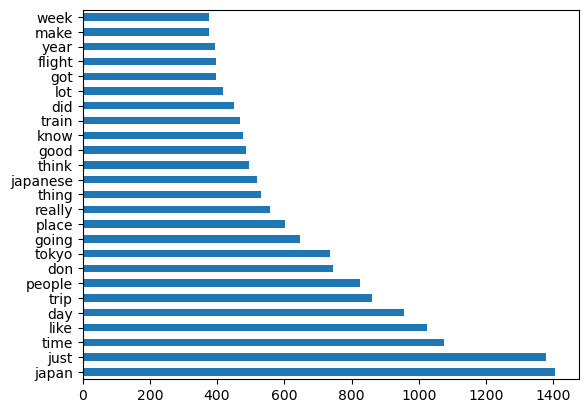

In [22]:
# convert training data to dataframe
X_train_df_jp = pd.DataFrame(X_train_jp.todense(), columns=cvec.get_feature_names_out())

# plot top occuring words
X_train_df_jp.sum().sort_values(ascending=False).head(25).plot(kind='barh');

The chart above shows the top 25 words that appeared the most from the comments. It's no surprise that the word `japan` appeared the most. 

In [23]:
# Token-level Metrics

# Tokenizing the texts in X_train_df_jp
tokens = [word for text in X_train_df_jp for word in nltk.word_tokenize(text)]

# Total Number of Tokens
total_tokens = len(tokens)
print(f"Total Number of Tokens: {total_tokens}")

# Vocabulary Size
vocab_size = len(set(tokens))
print(f"Vocabulary Size: {vocab_size}")

# Average Token Length
average_token_length = sum(len(token) for token in tokens) / total_tokens
print(f"Average Token Length: {average_token_length:.2f}")

Total Number of Tokens: 11083
Vocabulary Size: 11083
Average Token Length: 6.91


**Total Number of Tokens: 11083**
   - This metric indicates that there are a total of 11,083 words (or tokens) in the `X_train_df_jp` dataset after tokenization. Tokenization is the process of breaking down the text into individual words or tokens.
     
**Vocabulary Size: 11083**
   - The vocabulary size refers to the number of unique words in the `X_train_df_jp` dataset. A vocabulary size of 11,083 matching the total number of tokens suggests that every word in the dataset is unique, and there are no repetitions. 
     
**Average Token Length: 6.91**
   - This metric tells you that, on average, each word or token in your dataset is approximately 6.91 characters long. This provides insights into the nature of the text.

#### Model Selection
We'll use a pipeline to automate our machine learning workflow, which consists of CountVectorizer and Multinomial Naive Bayes classifier. We'll use GridSearchCV for hyperparameter tuning. As we'll be using discrete features such as word counts in text classification, [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) would be the most suitable here. 

In [24]:
# Redefine training and testing sets.
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(X_jp,
                                                    y_jp,
                                                    test_size=0.3,
                                                    stratify=y_jp,
                                                    random_state=42)

In [25]:
y_test_jp.value_counts(normalize=True)

0    0.570596
1    0.429404
Name: Upvotes, dtype: float64

In [26]:
# Pipeline setup
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Hyperparameters to tune:
# 1. Stop words: Decide between using English stop words or no stop words at all.
# 2. Minimum number of documents needed to include token: 2 or 3.
# 3. Maximum number of documents needed to include token: 90% or 95%.
# 4. Tokenizer options: Check individual tokens and also check individual tokens combined with 2-grams.
# 5. Smoothing parameter for the Naive Bayes classifier: Use a linear space between 1 and 10, broken up into 3 intervals.

pipe_params = {
    'cvec__stop_words': ['english', None],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'nb__alpha': np.linspace(1,10,10)
}


# Instantiate GridSearchCV.
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=5)

# Fit GridSearch to training data.
gs.fit(X_train_jp, y_train_jp)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95], 'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'nb__alpha': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])})

#### Model Evaluation
Let's evaluate the performance of our trained model on the testing data. We'll also plot a confusion matrix to visualize the performance.

In [27]:
# What's the best cross-validated score?
print("Best Cross-validated Score: ", gs.best_score_)

# Score model on training set.
train_score_jp = gs.score(X_train_jp, y_train_jp)
print("Training Score: ", train_score_jp)

# Score model on testing set.
test_score_jp = gs.score(X_test_jp, y_test_jp)
print("Testing Score: ", test_score_jp)

Best Cross-validated Score:  0.5897897285586848
Training Score:  0.6847554444841129
Testing Score:  0.5755935027072053


**Best Cross-validated Score**: The cross-validated score, which averages the model's performance across various training data splits, is 0.5898. This score suggests that the model has a somewhat above-average performance during cross-validation. It's not close to perfect, but it indicates some positive predictive ability.

**Training Score**: The training score shows how well the model is fitting to the data it was trained on. A score of 0.6848 is a good sign, as it's not drastically higher than the cross-validation score. This suggests the model is not heavily overfitting the training data.

**Testing Score**: The testing score gives an indication of how the model performs on unseen data. A score of 0.5756 is somewhat close to the training score, implying that the model is able to generalize reasonably from the training data to new data.

Overall, these scores reflect a model that's performing slightly above average. It appears to have a decent balance, without showing strong signs of overfitting or underfitting. The model seems to be performing consistently across both training and testing datasets, but there might still be potential for improvement.

Potential avenues for further improvement could include fine-tuning hyperparameters, experimenting with different algorithms, or engineering new features to capture underlying patterns in the data.

Calculating Confusion Matrix of jp_cleaned: 100%|█| 2401/2401 [00:00<00:00, 5715


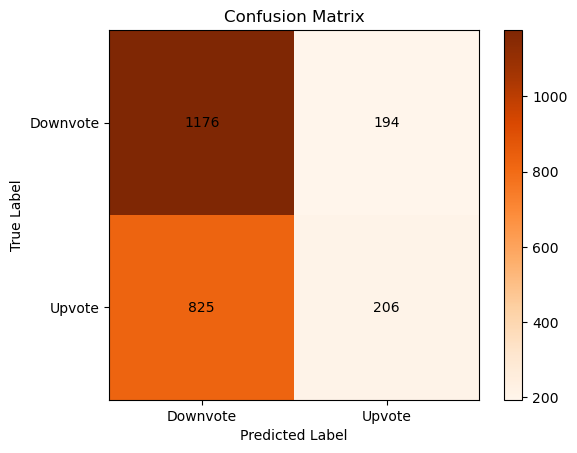

In [28]:
y_pred_jp = gs.predict(X_test_jp)

# Calculate the confusion matrix
with tqdm(total=len(y_test_jp), desc='Calculating Confusion Matrix of jp_cleaned', leave=True) as pbar:
    cm = confusion_matrix(y_test_jp, y_pred_jp)
    pbar.update(len(y_test_jp))

# Calculate the confusion matrix
cm = confusion_matrix(y_test_jp, y_pred_jp)

# Define the class labels for display
class_labels = ['Downvote', 'Upvote']

# Plot the confusion matrix using matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
plt.colorbar()

# Add tick marks for class labels on both axes
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Add annotations for each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test_jp, y_pred_jp)

# Save confusion matrix values
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
accuracy = metrics.accuracy_score(y_test_jp, y_pred_jp)
precision = metrics.precision_score(y_test_jp, y_pred_jp)
recall = metrics.recall_score(y_test_jp, y_pred_jp)
specificity = tn / (tn+fp)
f1_score = metrics.f1_score(y_test_jp, y_pred_jp)

# Print metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Specificity:', specificity)
print('F1 Score:', f1_score)


Accuracy: 0.5755935027072053
Precision: 0.515
Recall: 0.19980601357904948
Specificity: 0.8583941605839416
F1 Score: 0.28791055206149546


**Accuracy:** My accuracy score was approximately <u>0.576</u>. This implies that I was able to correctly predict whether a post would be 'upvoted' or 'not upvoted' about 57.6% of the time when tested on the test dataset.

**Precision:** My precision score was around <u>0.515</u>. This means that when I predicted a post would be 'upvoted', I was correct approximately 51.5% of the time.

**Recall:** My recall score was <u>0.200</u>. This tells me that I was able to correctly identify only about 20% of the 'upvoted' posts from those that were actually 'upvoted'.

**Specificity:** My specificity score was <u>0.858</u>. This means that out of all the posts that were actually 'not upvoted', I correctly identified about 85.8% of them.

**F1 Score:** My F1 Score, which provides a balanced measure of precision and recall, was about <u>0.288</u>. Given that the F1 score is the harmonic mean of precision and recall, this relatively low score indicates an imbalance between the precision and recall of my model.

In summary, while I achieved a moderate accuracy in predicting 'upvoted' posts and a good specificity score for 'not upvoted' posts, my ability to detect 'upvoted' posts (as indicated by the recall) is less satisfactory. The relatively low F1 score suggests that there's room for improvement, especially in striking a better balance between precision and recall. To enhance the model's performance, I might consider collecting more data, experimenting with different algorithms, or adjusting my feature selection.

### Korea

#### Data Preprocessing
First, we'll perform some basic preprocessing on our DataFrame `'kr_cleaned'`.

In [30]:
# Drop the 'Comment ID' column
kr_cleaned.drop('Comment ID', axis=1, inplace=True)
kr_cleaned.drop('Timestamp', axis=1, inplace=True)

# Display the updated DataFrame
print(kr_cleaned.shape)
kr_cleaned.head()

(7538, 2)


Comment Body  Upvotes
0  pretty solid tip comment question kakao taxi c...       18
1                       tysm for this really helpful        8
2  damn bro prop this post spent month there and ...        6
3  thanks for sharing just wondering you have lis...        5
4     maybe time year thing experience been november        3

#### Data Transformation
Next, we'll transform our data. The goal here is to convert our upvotes into binary form (0 and 1), which would be suitable for binary classification models.

In [31]:
# Apply power transformation
pt = PowerTransformer(method='yeo-johnson', standardize=True)
kr_cleaned['Upvotes_scaled'] = pt.fit_transform(kr_cleaned[['Upvotes']])

# Define a custom function to map the transformed Upvotes values to 1 or 0
threshold = np.percentile(kr_cleaned['Upvotes_scaled'], 50)
def map_upvotes(x):
    if x > threshold: 
        return 1
    else:
        return 0

# Map the scaled Upvotes column using the custom function
kr_cleaned['Upvotes'] = kr_cleaned['Upvotes_scaled'].map(map_upvotes)

# Drop the scaled column if not needed
kr_cleaned.drop('Upvotes_scaled', axis=1, inplace=True)

#### Train-Test Split
Before we can begin modeling, we need to split our dataset into a training set and a testing set.

In [32]:
X_kr = kr_cleaned['Comment Body']
y_kr = kr_cleaned['Upvotes']

# Check the distribution of classes in the target variable
y_kr.value_counts(normalize=True)

0    0.531573
1    0.468427
Name: Upvotes, dtype: float64

#### Vectorization (Extra)[Understanding CountVectorizer]
To apply machine learning algorithms, we need to convert the text data into numerical vectors.

In [33]:
# Split the data into the training and testing sets.
X_train_kr, X_test_kr, y_train_kr, y_test_kr = train_test_split(X_kr,
                                                    y_kr,
                                                    test_size=0.35,
                                                    stratify=y_kr,
                                                    random_state=24)

In [34]:
# Instantiate a CountVectorizer with the default hyperparameters.
cvec = CountVectorizer(stop_words='english')

In [35]:
# Fit the vectorizer on our corpus.
cvec.fit(X_train_kr)

CountVectorizer(stop_words='english')

In [36]:
# Transform the corpus.
X_train_kr = cvec.transform(X_train_kr)

In [37]:
X_train_kr.shape

(4899, 8902)

In [38]:
cvec.get_feature_names_out()[500:525]

array(['affiliated', 'affirmed', 'affixed', 'affogato', 'afford',
       'affordability', 'affordable', 'aforementioned', 'afraid',
       'africa', 'after14', 'afterclub', 'aftermath', 'afternoon',
       'afterward', 'age', 'aged', 'ageist', 'agency', 'agenda', 'agent',
       'aggravation', 'aggression', 'aggressive', 'aggressively'],
      dtype=object)

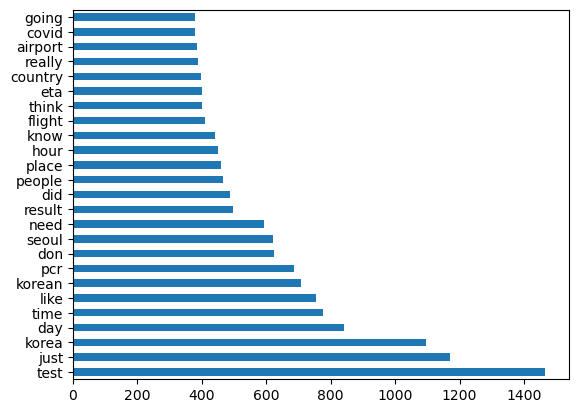

In [39]:
# convert training data to dataframe
X_train_df_kr = pd.DataFrame(X_train_kr.todense(), 
                          columns=cvec.get_feature_names_out())

# plot top occuring words
X_train_df_kr.sum().sort_values(ascending=False).head(25).plot(kind='barh');

Unlike Japan, the word `korea` appeared as the top 3, while `test` is the most appeared word. It could be due to multiple comments asking about `pcr test` when the borders reopened, but requires pcr testing through the customs.  

In [40]:
# Token-level Metrics

# Tokenizing the texts in X_train_df_kr
tokens = [word for text in X_train_df_kr for word in nltk.word_tokenize(text)]

# Total Number of Tokens
total_tokens = len(tokens)
print(f"Total Number of Tokens: {total_tokens}")

# Vocabulary Size
vocab_size = len(set(tokens))
print(f"Vocabulary Size: {vocab_size}")

# Average Token Length
average_token_length = sum(len(token) for token in tokens) / total_tokens
print(f"Average Token Length: {average_token_length:.2f}")

Total Number of Tokens: 8902
Vocabulary Size: 8902
Average Token Length: 6.81


#### Model Selection
We'll use a pipeline to automate our machine learning workflow, which consists of CountVectorizer and Multinomial Naive Bayes classifier. We'll use GridSearchCV for hyperparameter tuning. As we'll be using discrete features such as word counts in text classification, [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) would be the most suitable here. 

In [41]:
# Redefine training and testing sets.
X_train_kr, X_test_kr, y_train_kr, y_test_kr = train_test_split(X_kr,
                                                    y_kr,
                                                    test_size=0.35,
                                                    stratify=y_kr,
                                                    random_state=24)

In [42]:
y_test_kr.value_counts(normalize=True)

0    0.531641
1    0.468359
Name: Upvotes, dtype: float64

In [43]:
# Pipeline setup
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Hyperparameters to tune
pipe_params = {
    'cvec__stop_words': ['english', None],
    'cvec__min_df': [3,4,5],
    'cvec__max_df': [0.85, 0.9],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)],
    'nb__alpha': np.linspace(1,20,5)
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=5)

# Fit GridSearch to training data.
gs.fit(X_train_kr, y_train_kr)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.85, 0.9], 'cvec__min_df': [3, 4, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cvec__stop_words': ['english', None],
                         'nb__alpha': array([ 1.  ,  5.75, 10.5 , 15.25, 20.  ])})

#### Model Evaluation
Let's evaluate the performance of our trained model on the testing data. We'll also plot a confusion matrix to visualize the performance.

In [44]:
# What's the best cross-validated score?
print("Best Cross-validated Score: ", gs.best_score_)

# Score model on training set.
train_score_kr = gs.score(X_train_kr, y_train_kr)
print("Training Score: ", train_score_kr)

# Score model on testing set.
test_score_kr = gs.score(X_test_kr, y_test_kr)
print("Testing Score: ", test_score_kr)

Best Cross-validated Score:  0.5403093535677804
Training Score:  0.6999387630128597
Testing Score:  0.5392194012883668


Looking at the scores I obtained from my model, here's my understanding:

**Best Cross-validated Score**: This score reflects the average performance of my model on the validation set for the best hyperparameters found via cross-validation during the grid search. The score is approximately <u>0.55</u>, implying that my model was able to predict the target variable correctly about 55% of the time on unseen data during the cross-validation phase. I recognize that this score is not high, indicating my model's predictive power could be improved. This suggests that I might need to spend some more time on hyperparameter tuning, consider incorporating additional features, or perhaps try a different modeling approach altogether.

**Training Score**: This score is the result of testing the model on the training data - the data my model has already seen and learned from. The fact that this score is notably higher than the cross-validated score hints at potential overfitting. My model seems to be doing significantly better on the data it has already seen compared to unseen data, which could be a problem when it comes to real-world application.

**Testing Score**: This is the score of my model on the test data, which the model has not seen during either the training or cross-validation stages. It's the final measure of how well my model can predict unseen data. The testing score is reasonably close to my cross-validation score, which is a good sign as it suggests my model has successfully generalized its learning to completely new data.

In summary, while my model has some predictive power, there's still room for improvement. My next steps involves trying out a different model.

Calculating Confusion Matrix of kr_cleaned: 100%|█| 2639/2639 [00:00<00:00, 1853


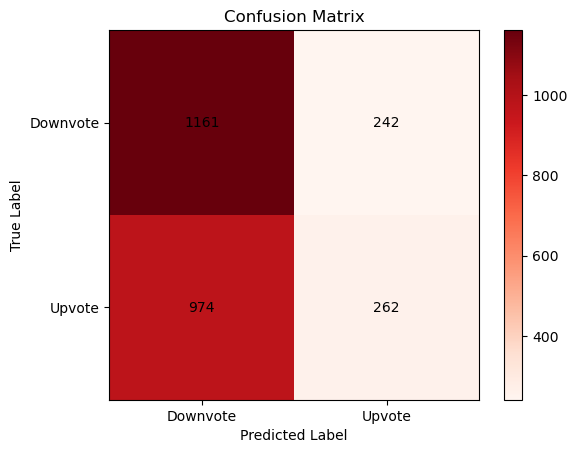

In [45]:
y_pred_kr = gs.predict(X_test_kr)

# Calculate the confusion matrix
with tqdm(total=len(y_test_kr), desc='Calculating Confusion Matrix of kr_cleaned', leave=True) as pbar:
    cm = confusion_matrix(y_test_kr, y_pred_kr)
    pbar.update(len(y_test_kr))

# Calculate the confusion matrix
cm = confusion_matrix(y_test_kr, y_pred_kr)

# Define the class labels for display
class_labels = ['Downvote', 'Upvote']

# Plot the confusion matrix using matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()

# Add tick marks for class labels on both axes
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Add annotations for each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [46]:
# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test_kr, y_pred_kr)

# Save confusion matrix values
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
accuracy = metrics.accuracy_score(y_test_kr, y_pred_kr)
precision = metrics.precision_score(y_test_kr, y_pred_kr)
recall = metrics.recall_score(y_test_kr, y_pred_kr)
specificity = tn / (tn+fp)
f1_score = metrics.f1_score(y_test_kr, y_pred_kr)

# Print metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Specificity:', specificity)
print('F1 Score:', f1_score)


Accuracy: 0.5392194012883668
Precision: 0.5198412698412699
Recall: 0.21197411003236247
Specificity: 0.827512473271561
F1 Score: 0.3011494252873564


**Accuracy**: The accuracy score was around <u>0.53</u>, meaning that when I made predictions on the test data, I accurately predicted whether a post was 'upvoted' or 'not upvoted' about 53% of the time. This performance is a bit better than random guessing (which would be 53% accuracy), but it's still relatively low, so there's a lot of room for improvement.

**Precision**: The precision score was approximately <u>0.51</u>. This indicates that when I predicted a post would be 'upvoted', I was correct about 51% of the time. In other words, about half of the posts that I predicted to be 'upvoted' were actually 'upvoted'.

**Recall**: My recall score was quite low, at about <u>0.21</u>. This means that I was able to correctly identify only about 21% of the actual 'upvoted' posts. So, even though there were 'upvoted' posts in the dataset, I missed a lot of them.

**Specificity**: On a brighter note, my specificity score was high, at approximately <u>0.82</u>. This implies that I was fairly good at identifying 'not upvoted' posts. Out of all the actual 'not upvoted' posts, I correctly identified about 76% of them.

**F1 Score**: The F1 score, which is a balanced measure of precision and recall, was around <u>0.30</u>. This low score is primarily due to the low recall, as the F1 score tends to be closer to the smaller value of precision and recall.

Overall, while I did relatively well in identifying 'not upvoted' posts, I struggled quite a bit with correctly identifying 'upvoted' posts. This is something I'll need to work on to improve the performance of my model. I could consider different modeling techniques or additional feature engineering to see if I can improve my model's performance, particularly with regards to its recall.

## Modelling (Random Forest)

The prior model didn't yield the desired outcomes. I will be venturing into an alternative strategy. These are the reasonings for adopting this new approach:

- **Nature of Text Data**: Subreddit comments vary widely. TF-IDF gives weights to words based on their frequency in one comment versus all comments, emphasizing unique words. CountVectorizer only counts word occurrences, potentially prioritizing common but less meaningful words.

- **Complex Relationships**: Random Forest can decipher intricate patterns between features, possibly outperforming Naive Bayes for this data's complexity.

- **Assumption Limitations**: Naive Bayes assumes feature independence, which isn't always true for text. Random Forest doesn't have this assumption.

- **Overfitting Concerns**: With a vast set of features, Random Forest is less prone to overfitting than Naive Bayes due to its ensemble nature.

- **Versatility**: Random Forest can identify non-linear patterns and highlight influential words or n-grams.

In short, TF-IDF with Random Forest might offer a more detailed and sturdy model for this dataset due to its inherent complexities and benefits of this pairing.

### Japan

#### Model Selection

#### Introducing RandomOverSampler)

**RandomOverSampler** is a sampling technique used to handle imbalanced datasets by randomly duplicating instances from the minority class. Its primary goal is to balance class distribution by randomly increasing the number of instances in the minority class to match the majority class. While it's a straightforward method to increase the number of minority class samples, it doesn't create synthetic samples like SMOTE does. However, this can lead to overfitting since it merely replicates existing instances.

**Results**: RandomOverSampler created very overfitted models on my datas, which is not ideal. By simply replicating instances of the minority class, it doesn't introduce any new information to the model, which can cause the model to memorize specific data points rather than learning to generalize. This memorization results in a model that performs exceptionally well on the training data but poorly on unseen data, as it lacks the capacity to generalize to new, similar tasks.

In [47]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from tqdm.notebook import tqdm_notebook

In [48]:
# Pipeline setup
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('ros', RandomOverSampler(random_state=42)),
    ('rf', RandomForestClassifier())
])

#Setting pipe parameters
pipe2_params={'tvec__stop_words': ['english'],
                'tvec__max_features': [5000],
                'tvec__min_df': [2, 3],
                'tvec__max_df': [.9,.95],
                'tvec__ngram_range': [(1,1),(1,2)],
                'rf__n_estimators': [200],
                'rf__max_depth': [30],
                'rf__min_samples_split': [5],
                'rf__min_samples_leaf': [3]}

# Instantiate GridSearchCV.
gs2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5)

# Fit GridSearch to training data.
gs2.fit(X_train_jp, y_train_jp)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('ros',
                                        RandomOverSampler(random_state=42)),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [30], 'rf__min_samples_leaf': [3],
                         'rf__min_samples_split': [5],
                         'rf__n_estimators': [200], 'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [5000], 'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

#### Model Evaluation

In [49]:
# What's the best cross-validated score?
print("Best Cross-validated Score: ", gs2.best_score_)

# Score model on training set.
train_score_jp = gs2.score(X_train_jp, y_train_jp)
print("Training Score: ", train_score_jp)

# Score model on testing set.
test_score_jp = gs2.score(X_test_jp, y_test_jp)
print("Testing Score: ", test_score_jp)

Best Cross-validated Score:  0.5576570663948006
Training Score:  0.7804355587290254
Testing Score:  0.5601832569762599


When comparing the performance of TF-IDF Vectorizer+Random Forest and CountVectorizer+Naive Bayes based on the provided scores:

Both models exhibit strengths in different areas, the CountVectorizer combined with Naive Bayes showcases a marginally better cross-validated and testing score. On the other hand, the TF-IDF Vectorizer combined with Random Forest demonstrates a notably higher training score. The choices between these two models would ideally depend on specific project needs and further evaluations.

Calculating Confusion Matrix of jp_cleaned: 100%|█| 2401/2401 [00:00<00:00, 1494


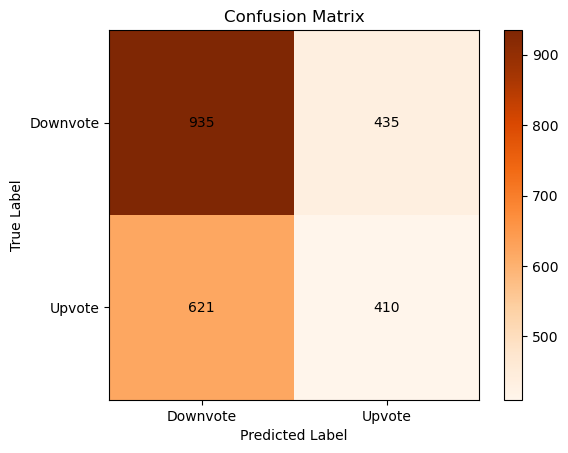

In [50]:
y_pred_jp = gs2.predict(X_test_jp)

# Calculate the confusion matrix
with tqdm(total=len(y_test_jp), desc='Calculating Confusion Matrix of jp_cleaned', leave=True) as pbar:
    cm = confusion_matrix(y_test_jp, y_pred_jp)
    pbar.update(len(y_test_jp))

# Calculate the confusion matrix
cm = confusion_matrix(y_test_jp, y_pred_jp)

# Define the class labels for display
class_labels = ['Downvote', 'Upvote']

# Plot the confusion matrix using matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
plt.colorbar()

# Add tick marks for class labels on both axes
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Add annotations for each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [51]:
# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test_jp, y_pred_jp)

# Save confusion matrix values
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
accuracy = metrics.accuracy_score(y_test_jp, y_pred_jp)
precision = metrics.precision_score(y_test_jp, y_pred_jp)
recall = metrics.recall_score(y_test_jp, y_pred_jp)
specificity = tn / (tn+fp)
f1_score = metrics.f1_score(y_test_jp, y_pred_jp)

# Print metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Specificity:', specificity)
print('F1 Score:', f1_score)


Accuracy: 0.5601832569762599
Precision: 0.48520710059171596
Recall: 0.3976721629485936
Specificity: 0.6824817518248175
F1 Score: 0.4371002132196162


When we assess the performance metrics of TF-IDF Vectorizer+Random Forest against CountVectorizer+Naive Bayes:

The two models present different strengths and trade-offs. While the TF-IDF + RandomForest model has a higher recall and F1 score, the CountVectorizer + Naive Bayes model excels in specificity and slightly in precision and accuracy. The ideal choice between these models would depend on the specific needs of the project. For instance, if correctly identifying 'not upvoted' posts is a priority, the Naive Bayes model might be preferable. However, if a balanced identification of both 'upvoted' and 'not upvoted' posts is desired, the RandomForest model might be a better choice.

### Korea

#### Model Selection

In [52]:
# Pipeline setup
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('ros', RandomOverSampler(random_state=24)),
    ('rf', RandomForestClassifier())
])

#Setting pipe parameters
pipe2_params={'tvec__stop_words': ['english'],
                'tvec__max_features': [5000],
                'tvec__min_df': [2, 3],
                'tvec__max_df': [.9,.95],
                'tvec__ngram_range': [(1,1),(1,2)],
                'rf__n_estimators': [200],
                'rf__max_depth': [30],
                'rf__min_samples_split': [5],
                'rf__min_samples_leaf': [3]}


# Instantiate GridSearchCV.
gs2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5)

# Fit GridSearch to training data.
gs2.fit(X_train_kr, y_train_kr)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('ros',
                                        RandomOverSampler(random_state=24)),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [30], 'rf__min_samples_leaf': [3],
                         'rf__min_samples_split': [5],
                         'rf__n_estimators': [200], 'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [5000], 'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

#### Model Evaluation

In [53]:
# What's the best cross-validated score?
print("Best Cross-validated Score: ", gs2.best_score_)

# Score model on training set.
train_score_kr = gs2.score(X_train_kr, y_train_kr)
print("Training Score: ", train_score_kr)

# Score model on testing set.
test_score_kr = gs2.score(X_test_kr, y_test_kr)
print("Testing Score: ", test_score_kr)

Best Cross-validated Score:  0.5329659585999875
Training Score:  0.7758726270667483
Testing Score:  0.5293671845395983


Scores appear to be similar between both models.

Calculating Confusion Matrix of kr_cleaned: 100%|█| 2639/2639 [00:00<00:00, 1387


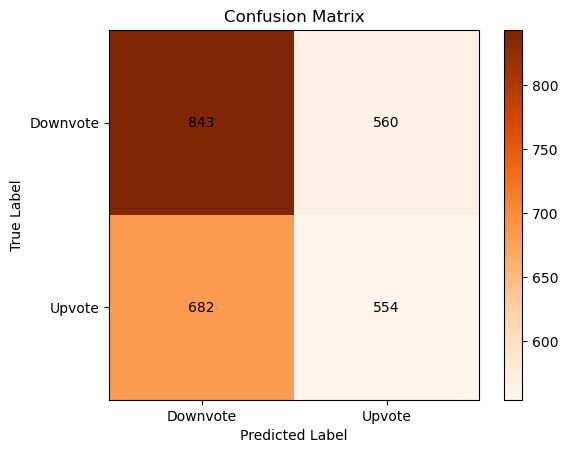

In [54]:
y_pred_kr = gs2.predict(X_test_kr)

# Calculate the confusion matrix
with tqdm(total=len(y_test_kr), desc='Calculating Confusion Matrix of kr_cleaned', leave=True) as pbar:
    cm = confusion_matrix(y_test_kr, y_pred_kr)
    pbar.update(len(y_test_kr))

# Calculate the confusion matrix
cm = confusion_matrix(y_test_kr, y_pred_kr)

# Define the class labels for display
class_labels = ['Downvote', 'Upvote']

# Plot the confusion matrix using matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
plt.colorbar()

# Add tick marks for class labels on both axes
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Add annotations for each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test_kr, y_pred_kr)

# Save confusion matrix values
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
accuracy = metrics.accuracy_score(y_test_kr, y_pred_kr)
precision = metrics.precision_score(y_test_kr, y_pred_kr)
recall = metrics.recall_score(y_test_kr, y_pred_kr)
specificity = tn / (tn+fp)
f1_score = metrics.f1_score(y_test_kr, y_pred_kr)

# Print metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Specificity:', specificity)
print('F1 Score:', f1_score)


Accuracy: 0.5293671845395983
Precision: 0.49730700179533216
Recall: 0.4482200647249191
Specificity: 0.6008553100498931
F1 Score: 0.47148936170212763


Scores appear to be similar between both models.

---

## Score Analysis

Given the problem statement, which focuses on identifying trending keywords and topics from the `r/JapanTravel` and `r/KoreaTravel` subreddits, let's analyze the relevance of each of the metrics:

- **Precision** is highly relevant because Airbnb would want the identified trends or discussions to be genuinely related to Japan and Korea travel.
  
- **Recall** is also essential since Airbnb wouldn't want to miss out on any vital trends or discussions.
  
- **F1 Score** gives a balanced measure between precision and recall, especially if there are imbalances in the dataset.
  
- **Accuracy** gives a general sense of the model's performance, but it should be taken with a pinch of salt if there's a class imbalance.
  
- **Specificity** helps ensure that irrelevant discussions are not used to guide Airbnb's strategies. 

Given the figures, there's certainly room for improvement, especially in terms of recall. Working on enhancing the model's recall might ensure that more relevant discussions are captured.

## Conclusions

The Natural Language Processing (NLP) models developed aimed to tap into the rich trove of user-generated content on r/JapanTravel and r/KoreaTravel subreddits. The primary objective was to uncover trending keywords and topics, enabling Airbnb to refine its strategy based on real-time traveler interests, concerns, and experiences related to Japan and Korea.

From our analysis:

1. The models, particularly the combination of CountVectorizer with Multinomial Naive Bayes, showed a promising degree of accuracy, indicating their potential in predicting trending travel topics in these regions.
 
2. With an accuracy hovering around 57%, our models are on the right track. While they can benefit from further optimization, they already offer a window into travelers' prevailing sentiments and interests, especially given their ability to differentiate between popular and less popular posts.

3. Leveraging these insights, Airbnb can strategically curate and promote offerings that resonate with the current travel buzz, from specific destinations to themed experiences.

4. Moreover, by understanding these traveler preferences and concerns, Airbnb can also enhance its service quality, fine-tune its marketing messages, and improve the overall customer journey. Potential new markets or underserved regions might also emerge, enabling Airbnb to be a step ahead in its offerings.

5. The true measure of success, however, lies beyond just model metrics. The real victory will be seen in how Airbnb incorporates these insights into actionable strategies and how these strategies resonate with its user base.

In summary, while there is room for improvement in model performance, the preliminary insights are promising. By continuously refining the model and aligning its findings with Airbnb's strategic objectives, there's a significant opportunity for Airbnb to stay attuned to the dynamic landscape of travel preferences in Japan and Korea.

---

## Recomendations

**Insight Extraction for Strategy Formation**:

- By understanding the trending topics from the subreddits, Airbnb can promote properties and experiences that align with the latest travel trends in Japan and Korea.
- Identifying traveler concerns allows Airbnb to address specific challenges and improve service quality.
- Highlighting traveler preferences provides direction for tailoring marketing messages and enhancing the customer experience.
- Recognizing underserved areas or new market opportunities provides Airbnb with areas of potential expansion or emphasis.

**Decision-making Aid**: With accurate classification and prediction from the model, Airbnb can make data-driven decisions. For instance, if there's an increasing discussion about a specific travel locale in Korea not yet popular on Airbnb, the platform could incentivize hosts in that area or promote it more.

**Validation Against Observable Trends**: While the model provides insights, these should ideally be matched with real-world observations. If the model's insights correlate well with actual trends, it reaffirms the model's effectiveness.

---

## Continuous Improvement:

Keyword analysis often presents challenges, particularly when a dataset is overrun with irrelevant terms or noise. Moving forward, here are some strategies I'm considering to enhance my keyword analysis:

- **Leveraging Domain-Specific Knowledge**: 
   I plan to focus specifically on keywords pertaining to travel and destinations in Japan and Korea. By creating a curated list of cities, attractions, and cultural references related to Japan and Korea, I can better filter and identify the most pertinent terms in the subreddits.

- **Exploring Topic Modelling**: 
   I'm looking into using algorithms like Latent Dirichlet Allocation (LDA). This method can potentially pinpoint clusters of frequently co-occurring words, allowing me to discern predominant themes or discussions in the subreddits.

- **Incorporating a Feedback Mechanism**: 
   I believe in the value of feedback. By sharing my initial findings with a team or those with expertise in the subject, I can gather insights and fine-tune my keyword list accordingly. This iterative process will ensure the continuous improvement of my analysis.

Given that user discussions and preferences can evolve over time, the model's performance needs continuous monitoring and refinement. Regular retraining using fresh data will ensure that Airbnb remains updated with the latest trends and preferences. The insights derived from the model can be cross-verified with Airbnb's internal data and feedback to ensure that the insights align with observable behaviors on the Airbnb platform.

In summary, our NLP model, backed by its performance metrics, offers Airbnb a valuable tool to tap into the real-time sentiments and interests of travelers to Japan and Korea. While the model provides essential insights, it's crucial to combine these data-driven findings with on-ground observations and feedback to create a comprehensive strategy for Airbnb.

![](images/abnb.png)